# **Supervised Learning**

**Data Description**

1. CustomerID : Unique customer ID
2. ProdTaken : Whether the product is taken (1) or not (0)
3. Age : Age of the customer
4. TypeofContact : How customer was contacted (Company Invited or Self Inquiry)
5. CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch : Duration of the pitch by a salesperson to the customer
7. Occupation : Occupation of customer
8. Gender : Gender of customer
9. NumberOfPersonVisiting : Total number of persons planning to take the trip with the customer
10. NumberOfFollowups : Total number of follow-ups has been done by the salesperson after the sales pitch
11. ProductPitched : Product pitched by the salesperson
12. PreferredPropertyStar : Preferred hotel property rating by customer
13. MaritalStatus : Marital status of customer
14. NumberOfTrips : Average number of trips in a year by customer
15. Passport : The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore : Sales pitch satisfaction score
17. OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting : Total number of children with age less than 5 planning to take the trip with the customer
19. Designation : Designation of the customer in the current organization
20. MonthlyIncome : Gross monthly income of the customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Google Colab/preprocessed_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Google Colab/preprocessed_test.csv')

In [4]:
train.head()

ProdTaken       Age  TypeofContact  CityTier  DurationOfPitch  Gender  \
0        0.0 -0.171019            1.0       3.0        -1.162194     1.0   
1        0.0 -0.171019            1.0       1.0        -0.914522     1.0   
2        0.0 -0.280484            0.0       1.0        -0.666850     1.0   
3        0.0  0.047911            1.0       1.0         1.314528     1.0   
4        0.0  0.047911            1.0       1.0        -1.162194     0.0   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0          -2.693587                    5.0      -0.673531       0.0   
1          -0.703231                    3.0      -0.673531       0.0   
2           0.291947                    3.0      -0.673531       0.0   
3           0.291947                    4.0       1.520339       0.0   
4          -0.703231                    5.0       0.423404       0.0   

   PitchSatisfactionScore  MonthlyIncome  MarketingCost  \
0                     4.0      -0.244061      -1.415815   
1                     5.0      -1.002411      -0.919053   
2                     2.0       0.578047      -0.477486   
3                     4.0      -0.362243       1.288782   
4                     2.0      -1.172831      -1.084640   

   Occupation:Large Business  Occupation:Salaried  ProductPitched:Deluxe  \
0                        0.0                  0.0                    1.0   
1                        0.0                  1.0                    0.0   
2                        0.0                  1.0                    1.0   
3                        0.0                  1.0                    0.0   
4                        0.0                  1.0                    0.0   

   ProductPitched:King  ProductPitched:Super Deluxe  MaritalStatus:Married  \
0                  0.0                          0.0                    1.0   
1                  0.0                          0.0                    1.0   
2                  0.0                          0.0                    0.0   
3                  0.0                          0.0                    1.0   
4                  0.0                          0.0                    0.0   

   MaritalStatus:Single  Designation:Executive  Designation:Manager  \
0                   0.0                    0.0                  1.0   
1                   0.0                    1.0                  0.0   
2                   1.0                    0.0                  1.0   
3                   0.0                    1.0                  0.0   
4                   1.0                    1.0                  0.0   

   Designation:VP  AgeStructure:Prime working age  
0             0.0                             1.0  
1             0.0                             1.0  
2             0.0                             1.0  
3             0.0                             1.0  
4             0.0                             1.0

# **Splitting Data**

In [5]:
y_train = train.ProdTaken
X_train = train.drop(['ProdTaken', 'DurationOfPitch', 'Designation:Manager', 'Designation:VP','MaritalStatus:Married'], axis= 1)

y_test = test.ProdTaken
X_test = test.drop(['ProdTaken', 'DurationOfPitch', 'Designation:Manager', 'Designation:VP','MaritalStatus:Married'], axis= 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6186, 19), (1584, 19), (6186,), (1584,))

In [49]:
X_train.columns

Index(['Age', 'TypeofContact', 'CityTier', 'Gender', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'MonthlyIncome', 'MarketingCost',
       'Occupation:Large Business', 'Occupation:Salaried',
       'ProductPitched:Deluxe', 'ProductPitched:King',
       'ProductPitched:Super Deluxe', 'MaritalStatus:Single',
       'Designation:Executive', 'AgeStructure:Prime working age'],
      dtype='object')

# **Modeling**

In [6]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support

In [8]:
# cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

In [7]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Train Set): %.2f" % model.score(xtrain, ytrain))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("\nPrecision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))


def evaluate_prediction(y_test, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_test, y_pred) * 100

  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
  model_evaluation = {"accuracy": model_accuracy,
                      "precision": model_precision,
                      "recall": model_recall,
                      "f1": model_f1}
  return model_evaluation

# **Logistic Regression**

In [9]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42, class_weight='balanced')
scores = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.8314454819475944

In [10]:
# Fit the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)
eval_classification(model_lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.73

Precision (Test Set): 0.73
Recall (Test Set): 0.74
F1-Score (Test Set): 0.73
AUC: 0.73


In [11]:
model_lr.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
logistic_evaluation = evaluate_prediction(y_test, y_pred)
logistic_evaluation

{'accuracy': 73.04292929292929,
 'precision': 0.7305119777238737,
 'recall': 0.7304292929292929,
 'f1': 0.7304051169648333}

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(model_lr.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(model_lr.score(X_test[X_train.columns], y_test)))

y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.76
Accuracy of XGB classifier on test set: 0.73
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73       792
         1.0       0.73      0.74      0.73       792

    accuracy                           0.73      1584
   macro avg       0.73      0.73      0.73      1584
weighted avg       0.73      0.73      0.73      1584



In [14]:
logistic_evaluation = evaluate_prediction(y_test, y_pred)

# **KNN**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import math 
model_knn = KNeighborsClassifier()
scores = cross_val_score(model_knn, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9818191875916006

In [16]:
# Fit the model
model_knn.fit(X_train, y_train)

# Make predictions
y_pred = model_knn.predict(X_test)
eval_classification(model_knn, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.83

Precision (Test Set): 0.80
Recall (Test Set): 0.87
F1-Score (Test Set): 0.83
AUC: 0.83


In [17]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Hyperparameter Tuning**

In [18]:
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
n_neighbors = list(range(4,16)) # int(math.sqrt(X_train.shape[0]))
leaf_size = list(range(10,150))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, leaf_size=leaf_size, algorithm=algorithm)

knn = KNeighborsClassifier()
model_knn = RandomizedSearchCV(knn, hyperparameters, cv=cv, random_state=42, scoring='roc_auc')

# Fit Model & Evaluasi
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
eval_classification(model_knn, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.87

Precision (Test Set): 0.87
Recall (Test Set): 0.87
F1-Score (Test Set): 0.87
AUC: 0.87


In [19]:
model_knn.best_estimator_.get_params()

{'algorithm': 'brute',
 'leaf_size': 149,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [20]:
knn_evaluation = evaluate_prediction(y_test, y_pred)

# **Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
scores = cross_val_score(model_dt, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9271999762988988

In [22]:
# Fit the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred = model_dt.predict(X_test)
eval_classification(model_dt, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.83

Precision (Test Set): 0.86
Recall (Test Set): 0.80
F1-Score (Test Set): 0.83
AUC: 0.83


In [23]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**Hyperparameter Tuning**

In [24]:
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
max_depth = [3,4,5] # Maximum number of levels in tree
min_samples_split = [20,30, 40, 50, 75, 100] # Minimum number of samples required to split a node
min_samples_leaf = [ 20,30, 40, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt','log2'] # Number of features to consider at every split
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model_dt = RandomizedSearchCV(dt, hyperparameters, cv=cv, random_state=42, scoring='roc_auc')
model_dt.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt.predict(X_test)
eval_classification(model_dt, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.80
Accuracy (Test Set): 0.73

Precision (Test Set): 0.75
Recall (Test Set): 0.68
F1-Score (Test Set): 0.71
AUC: 0.73


In [25]:
model_dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 40,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

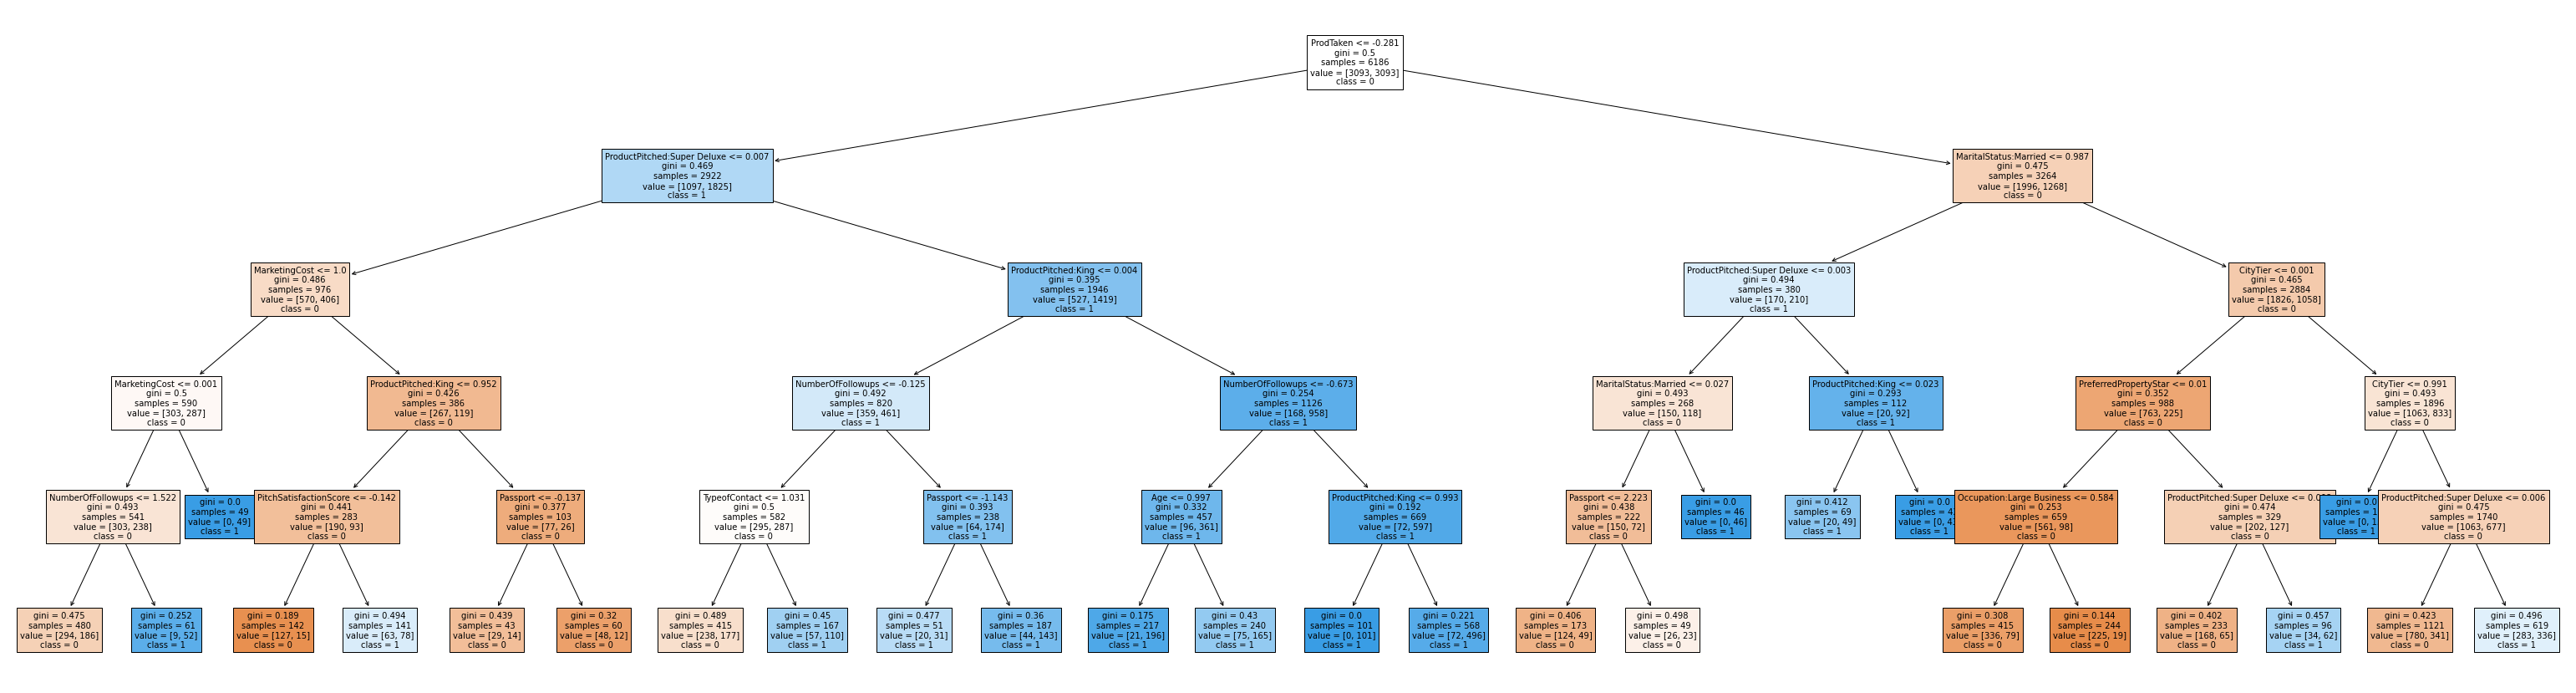

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(55,15))
tree.plot_tree(model_dt.best_estimator_,
               feature_names = train.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [27]:
decisiontree_evaluation = evaluate_prediction(y_test, y_pred)

# **Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced') # max_features=5, n_estimators=100
scores = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9945822094884266

In [29]:
# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)
eval_classification(model_rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92

Precision (Test Set): 0.97
Recall (Test Set): 0.87
F1-Score (Test Set): 0.92
AUC: 0.92


In [30]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**Hyperparameter Tuning**

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 4)]
max_depth = [3] 
min_samples_split = [20,30, 40, 50, 75, 100] 
min_samples_leaf = [10, 20, 30, 40, 50] 
max_features = ['auto', 'sqrt','log2'] 
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       n_estimators=n_estimators,
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)

# Inisialisasi Model
rf = RandomForestClassifier(random_state=42)
model_rf = RandomizedSearchCV(rf, hyperparameters, cv=cv, random_state=42, scoring='roc_auc', n_jobs=-1)
model_rf.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_rf.predict(X_test)
eval_classification(model_rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.81

Precision (Test Set): 0.82
Recall (Test Set): 0.79
F1-Score (Test Set): 0.80
AUC: 0.81


In [32]:
model_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 233,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [33]:
print('Best n_estimators:', model_rf.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', model_rf.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model_rf.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model_rf.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model_rf.best_estimator_.get_params()['max_features'])
print('Best criterion:', model_rf.best_estimator_.get_params()['criterion'])

Best n_estimators: 233
Best max_depth: 3
Best min_samples_split: 30
Best min_samples_leaf: 20
Best max_features: auto
Best criterion: entropy


In [34]:
random_forest_evaluation = evaluate_prediction(y_test, y_pred)

# **XGBoost Classifier**

In [35]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb, X_train, y_train, scoring='roc_auc', cv=cv)
scores.mean()

0.953458280204411

In [36]:
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
eval_classification(model_xgb, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.86

Precision (Test Set): 0.86
Recall (Test Set): 0.85
F1-Score (Test Set): 0.86
AUC: 0.86


In [37]:
model_xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [38]:
xgboost_evaluation = evaluate_prediction(y_test, y_pred)

**Hyperparameter Tuning**

In [39]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': [3],
             'learning_rate': [0.3, 0.2, 0.1, 0.05],
             'gamma': [0, 0.25, 0.5, 1.0],
             'reg_lambda':[0, 1.0, 2.0, 5.0, 10.0],
             'scale_pos_weight':[1,3,5],
             'min_child_weight':[1,3,5]}

# Inisialisasi Model
xgb = XGBClassifier(objective='binary:logistic', subsample=1, colsample_bytree=1, verbosity=1, random_state=42)
optimal_params = RandomizedSearchCV(xgb, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)

optimal_params.fit(X_train, y_train)

print(optimal_params.best_params_)
print('')

# Predict & Evaluation
y_pred = optimal_params.predict(X_test)
eval_classification(optimal_params, y_pred, X_train, y_train, X_test, y_test)

{'scale_pos_weight': 5, 'reg_lambda': 2.0, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.5}

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.77

Precision (Test Set): 0.70
Recall (Test Set): 0.94
F1-Score (Test Set): 0.80
AUC: 0.77


# **Model Comparison**

In [40]:
model_evaluations = pd.DataFrame({"logistic": logistic_evaluation,
                                  "knn": knn_evaluation,
                                  "decision_tree": decisiontree_evaluation,
                                  "random_forest":random_forest_evaluation,
                                  "xgboost": xgboost_evaluation}).T
model_evaluations

accuracy  precision    recall        f1
logistic       73.042929   0.730512  0.730429  0.730405
knn            87.373737   0.873740  0.873737  0.873737
decision_tree  72.790404   0.730313  0.727904  0.727191
random_forest  80.618687   0.806657  0.806187  0.806113
xgboost        85.732323   0.857469  0.857323  0.857309

In [41]:
# Scale the accuracy values
model_evaluations["accuracy"] = model_evaluations["accuracy"]/100 

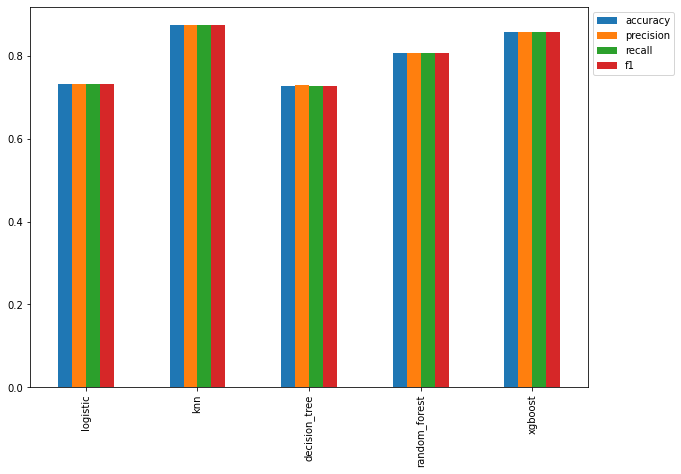

In [42]:
# Plot model evaluation metrics
model_evaluations.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1,1)) 

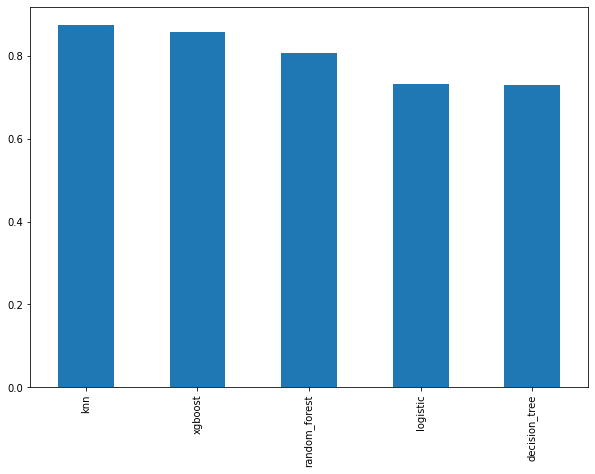

In [43]:
# Sort model evaluation by precision metric
model_evaluations.sort_values("precision", ascending=False)["precision"].plot(kind="bar", figsize=(10,7)) 

# **Final Model Evaluation**

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(model_xgb.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(model_xgb.score(X_test[X_train.columns], y_test)))

y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.89
Accuracy of XGB classifier on test set: 0.86
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       792
         1.0       0.86      0.85      0.86       792

    accuracy                           0.86      1584
   macro avg       0.86      0.86      0.86      1584
weighted avg       0.86      0.86      0.86      1584



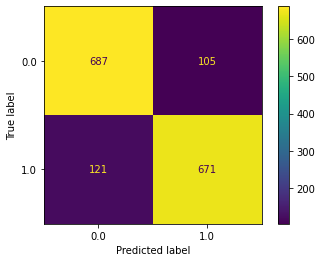

In [45]:
plot_confusion_matrix(model_xgb,
                     X_test,
                     y_test,
                     values_format='d') #display_labels=["Not Taken", "Taken"]

In [ ]:
pip install shap

In [52]:
import shap
# Fits the explainer
explainer = shap.Explainer(model_xgb.predict, X_test)
# Calculates the SHAP values
shap_values = explainer(X_test)

Permutation explainer: 1585it [04:34,  5.72it/s]


In [64]:
# Force plot untuk kelas 0  / ProdTaken=0
shap.initjs()
shap.plots.force(shap_values[1])

In [62]:
# Force plot untuk kelas 1 / ProdTaken=1
shap.initjs()
shap.plots.force(shap_values[0])

Calon customer yang memiliki passport, bekerja sebagai Executive, berstatus lajang, dan tidak memilih produk Deluxe berkontribusi meningkatkan prediksi terjualnya paket liburan (ProdTaken=1) pada model. Sedangkan calon customer yang tinggal di kawasan City Tier 1 berkontribusi menurunkan prediksi model.

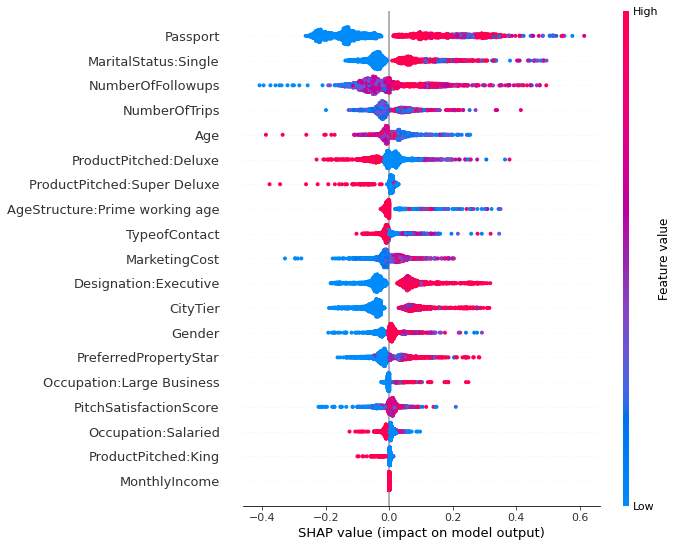

In [54]:
# Beeswarm plot 
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=27)

1. Calon customer yang memiliki Passport (`Passport`=1), berstatus lajang (`MaritalStatus`=Single), dan frekuensi follow up pitching tinggi memberikan pengaruh paling besar pada prediksi terjualnya paket liburan (`ProdTaken`=1).
2. Terdapat beberapa case di mana semakin tinggi usia calon customer (`Age`), prediksi terjualnya paket liburan (`ProdTaken`=1) semakin menurun.
3. Pemilihan paket Deluxe dan Super Deluxe sebagian besar menurunkan prediksi terjualnya paket liburan (ProdTaken=1).
4. Calon customer yang memiliki pekerjaan sebagai Executive (`Designation`=Executive) meningkatkan prediksi terjualnya paket liburan (ProdTaken=1).
5. Calon customer yang tinggal di kawasan` City Tier` 3, berpengaruh besar dalam meningkatkan prediksi terjualnya paket liburan (ProdTaken=1).
6. Sebagian besar calon customer pria berpengaruh dalam meningkatkan prediksi terjualnya paket liburan (ProdTaken=1).
7. Feature `MonthlyIncome` tidak memberikan pengaruh dalam prediksi model.

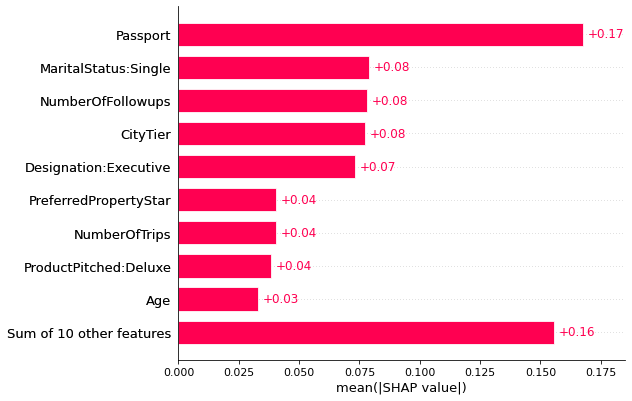

In [55]:
# Global bar plot
shap.plots.bar(shap_values)

Pada plot di atas, feature diurutkan dari yang berpengaruh paling tinggi hingga paling rendah pada prediksi model baik kejadian ProdTaken=1 maupun ProdTaken=0 (tanpa mempertimbangkan arah pengaruhnya). Feature yang paling penting dalam model adalah `Passport`, karena memiliki kontribusi dalam prediksi paling besar. 

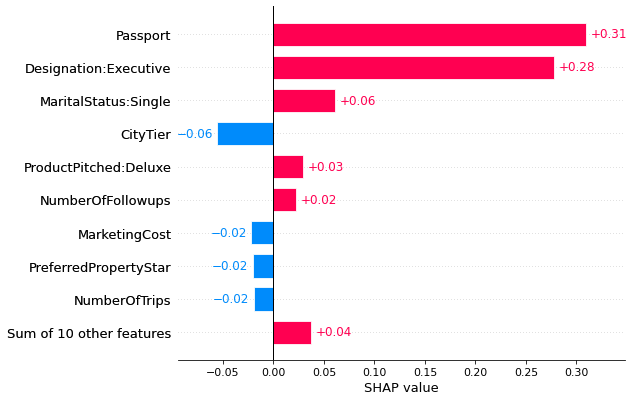

In [56]:
# Local bar plot (kelas 1 / ProdTaken = 1)
shap.plots.bar(shap_values[0])

Plot ini menunjukkan feature paling penting yang berkontribusi dalam prediksi terjualnya paket liburan (`ProdTaken`=1) adalah `Passport` dan `Designation:Executive`.

# **Feature Selection**

In [70]:
y_train_fs = train.ProdTaken
X_train_fs = train.filter(['Passport', 'MaritalStatus:Single', 'NumberOfFollowups', 'CityTier', 'Designation:Executive'])

y_test_fs = test.ProdTaken
X_test_fs = test.filter(['Passport', 'MaritalStatus:Single', 'NumberOfFollowups', 'CityTier', 'Designation:Executive'])

X_train_fs.shape, X_test_fs.shape, y_train_fs.shape, y_test_fs.shape

((6186, 5), (1584, 5), (6186,), (1584,))

In [72]:
from xgboost import XGBClassifier
model_xgb_fs = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb_fs, X_train_fs, y_train_fs, scoring='roc_auc', cv=cv)
scores.mean()

0.9127442426649738

In [74]:
model_xgb_fs.fit(X_train_fs, y_train_fs)

y_pred_fs = model_xgb_fs.predict(X_test_fs)
eval_classification(model_xgb_fs, y_pred_fs, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.85

Precision (Test Set): 0.89
Recall (Test Set): 0.80
F1-Score (Test Set): 0.84
AUC: 0.85


In [75]:
model_xgb_fs.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [80]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(model_xgb_fs.score(X_train_fs, y_train_fs)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(model_xgb_fs.score(X_test_fs[X_train_fs.columns], y_test_fs)))

y_pred_fs = model_xgb_fs.predict(X_test_fs)
print(classification_report(y_test_fs, y_pred_fs))

Accuracy of XGB classifier on training set: 0.86
Accuracy of XGB classifier on test set: 0.85
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       792
         1.0       0.89      0.80      0.84       792

    accuracy                           0.85      1584
   macro avg       0.85      0.85      0.85      1584
weighted avg       0.85      0.85      0.85      1584



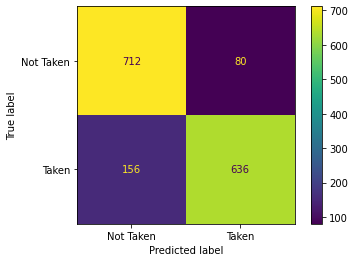

In [81]:
plot_confusion_matrix(model_xgb_fs,
                     X_test_fs,
                     y_test_fs,
                     values_format='d',
                     display_labels=["Not Taken", "Taken"])

In [83]:
y_pred_proba_fs = model_xgb_fs.predict_proba(X_test_fs)
y_pred_proba_fs = y_pred_proba_fs[:][:,1]

# dataframe ground truth and probability
y_test_fs_temp = y_test_fs.copy()
y_test_fs_temp.reset_index(drop=True, inplace=True)
y_pred_proba_fs = pd.concat([y_test_fs_temp, pd.DataFrame(y_pred_proba_fs)], axis=1)

y_pred_proba_fs.columns = ['y_test_actual', 'y_pred_proba']
y_pred_proba_fs.index = X_test_fs.index

Text(0, 0.5, 'True Positive Rate')

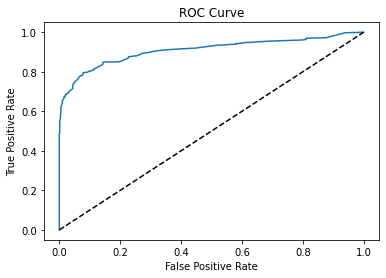

In [91]:
fpr, tpr, thresholds = roc_curve(y_pred_proba_fs['y_test_actual'], y_pred_proba_fs['y_pred_proba'])
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle='--', color='k')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

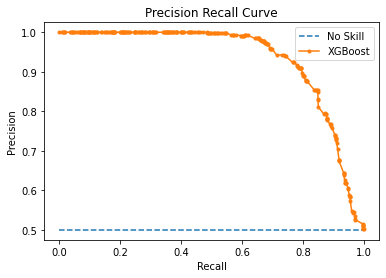

In [85]:
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
no_skill = len(y_test_fs[y_test_fs == 1]) / len(y_test_fs)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')

precision, recall, thresholds = precision_recall_curve(y_pred_proba_fs['y_test_actual'], y_pred_proba_fs['y_pred_proba'])
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()